C:\Users\mhari\AppData\Local\Temp\ipykernel_28520\2269940580.py:25: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 86ms/step - accuracy: 0.2812 - loss: 1.9821 - val_accuracy: 0.3163 - val_loss: 1.8890
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 119s 133ms/step - accuracy: 0.3191 - loss: 1.8769 - val_accuracy: 0.3287 - val_loss: 1.8561
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.3291 - loss: 1.8463 - val_accuracy: 0.3382 - val_loss: 1.8318
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.3381 - loss: 1.8242 - val_accuracy: 0.3425 - val_loss: 1.8188
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.3433 - loss: 1.8105 - val_accuracy: 0.3485 - val_loss: 1.8086
Test Accuracy: 34.85%


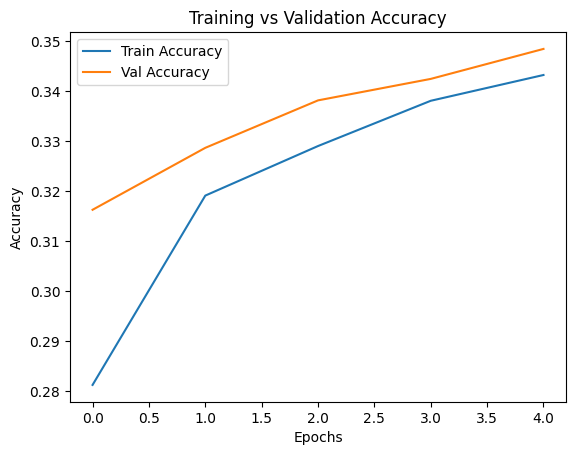

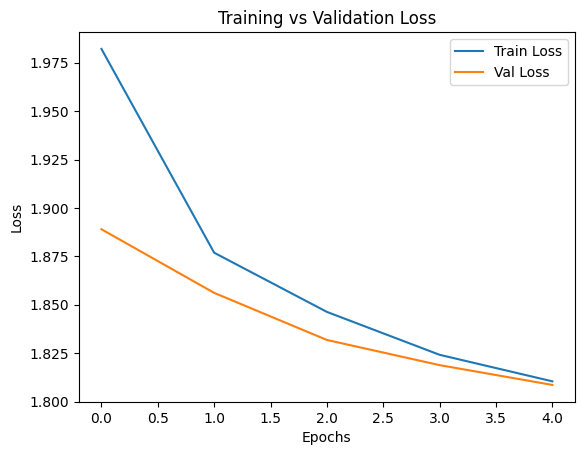

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


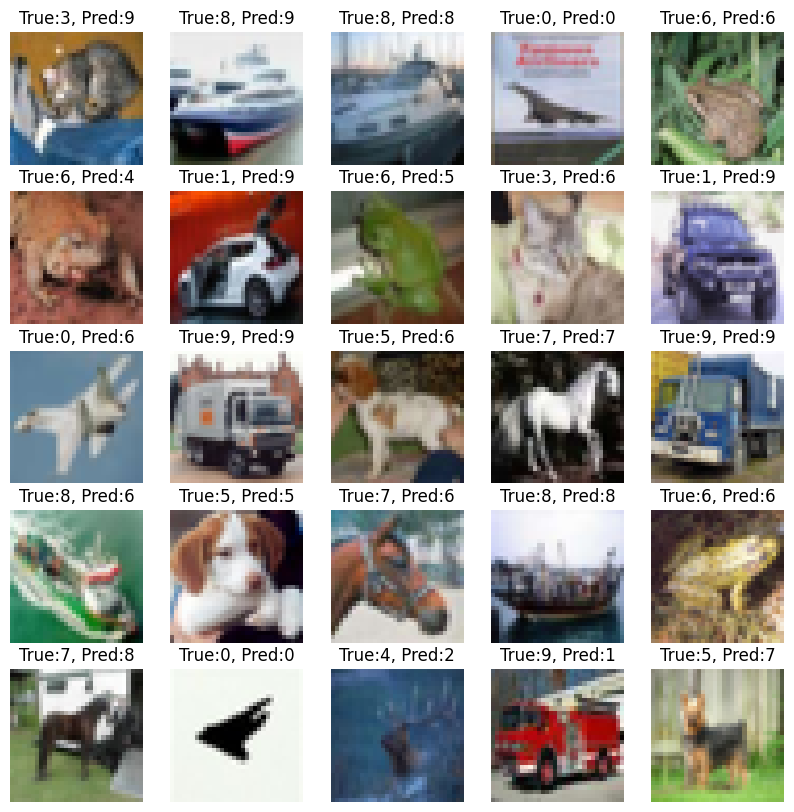

In [1]:
# Ex No: 5 Transfer Learning with CNN and Visualization

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import os

# Step 2: Load Dataset (Example: CIFAR-10 dataset for simplicity)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Step 3: Build Transfer Learning Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 4: Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

# Step 6: Evaluate Model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

# Step 7: Visualization

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

# Prediction Visualization
y_pred = np.argmax(model.predict(x_test[:25]), axis=1)
y_true = np.argmax(y_test[:25], axis=1)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"True:{y_true[i]}, Pred:{y_pred[i]}")
    plt.axis("off")
plt.show()
